### VIRAJ JALINDAR RAUT  
#### LinkedIn Profile : https://www.linkedin.com/in/viraj-raut-915b90209
# THE SPARK FOUNDATION
## TSF-GRIP TASK 5 ( Exploratory Data Analysis - IPL )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Modules are Imported")

Modules are Imported


### Importing the first dataset

In [2]:
df_matches=pd.read_csv("matches.csv")
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Imorting the second dataset

In [3]:
df_deliveries=pd.read_csv("deliveries.csv")
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Pre-processing on first dataset

In [4]:
df_matches.shape

(756, 18)

#### Dataset contains 756 IPL matches data with 18 attributes

In [5]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

### Drop columns that are not required

In [6]:
df_matches = df_matches.drop(['umpire2','umpire3'],axis=1)

In [7]:
df_matches.shape

(756, 16)

### Checking the info of the dataset

In [8]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
dtypes: int64(5), object(11)
memory usage: 94.6+ KB


### Checking the count of missing values in dataset

In [9]:
df_matches.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
dtype: int64

#### 7 Missing values in city column, 4 each in "winner" and "player of match" column

### Let's deals with missing values

In [10]:
df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [11]:
df_matches[df_matches.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena


In [12]:
df_matches[df_matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


#### As these dates belongs to the matches where the city columns values are missing and we see that all these matches belongs to the 2014 Season. So We Can Use These Dates And Season Year(2014) to find out the city of the match. On web seach we can check that all the matches with missing city was played at Dubai International Stadium.



### Fill this missing values with the "Dubai" city

In [13]:
df_matches.city=df_matches.city.fillna('Dubai')
df_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
dtype: int64

#### Now we can see that "city" column doesn't contain any missing values

### Deals with winner and player of match column

In [14]:
df_matches[df_matches.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong


In [15]:
df_matches[df_matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


#### We can see that missing values at column "winner" and "player of match" corresponds to the "result" column of match, So we don't need to remove this.

### Data pre-processing on second dataset

In [16]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
df_deliveries.shape

(179078, 21)

#### This dataset contains 179078 deliveries data with 21 attributes

In [18]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

### Checking the info of this dataset

In [19]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### Here the last three columns contains a lot of Missing values that are justified as this dataset consists of every delivery and a player can't be dismissed on every ball when the player is not out on any given ball then these column must be Missing and same with the dismissal kind column and fielder column because this fielder column corresponds to the player_dismissed & dismissal kind column and fielder column contains more Missing values than the other 2 columns because a fielder can't be involve in every dismissal (eg. Bowled, hit wicket etc.)

## CATEGORY 1 - ANALYSIS OF IPL TEAMS

In [20]:
teams=df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

#### We can see that a team "Rising Pune Supergiant" repeated twice due to spelling change so first correct this 

In [21]:
df_matches['winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants',inplace=True)

In [22]:
teams=df_matches['winner'].value_counts()
len(teams)

14

#### There are 14 Teams participated in ipl so far

### Teams with most number of wins

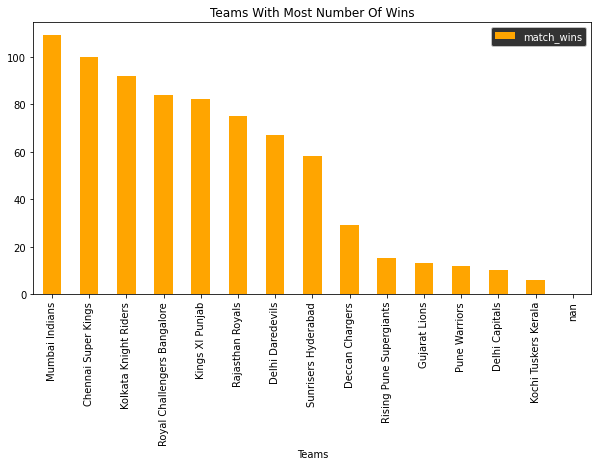

In [23]:
data = []

for i in df_matches['winner'].unique():
    data.append([i , len(df_matches[df_matches['winner'] ==i])])
pd.DataFrame(data,columns = ['Teams','match_wins']).sort_values(by='match_wins', ascending=False).plot(x = "Teams", y = "match_wins", title='Teams With Most Number Of Wins',kind = 'bar',color='orange' ,figsize = (10,5))
plt.style.use('dark_background')
plt.legend()

#### Mumbai Indians won most number of matches (109) followed by Chennai Super Kings (100) and Kolkata Knight Riders(92)

### Team won by maximum runs

In [24]:
df_matches['win_by_runs'].max()

146

#### 146 runs is the maximum run by which a team won
### Let's check this match info

In [25]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
Name: 43, dtype: object

#### This Match was played between Mumbai Indians & Delhi Daredevils on 6th May 2017 at Venue Feroz Shah Kotla Stadium, Delhi and Player of the match was LMP Simmons

### Team won by maximum wickets

In [26]:
df_matches['win_by_wickets'].max()

10

#### 10 wickets win is maximum win by wickets
### Let's check the info of this match

In [27]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
Name: 2, dtype: object

####  This Match was played between Gujarat Lions & Kolkata Knight Riders on 6th May 2017 at Venue  Saurashtra Cricket Association Stadium and Player of the match was CA Lynn

### Team with most number of title

In [28]:
#Creating a new dataframe
winners=df_matches[['season','winner']]

In [29]:
#Creating a empty dictionary for storing team name with most number of title
data = { }
for i in sorted(winners.season.unique()):
    data[i]=winners[winners.season==i]['winner'].tail(1).values[0]

season_winner=pd.Series(data)
#Creating the final dataframe
season_winner=pd.DataFrame(season_winner,columns=['season_winner'])
season_winner
    



,season_winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


In [30]:
season_winner=season_winner['season_winner'].value_counts()
season_winner


Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: season_winner, dtype: int64

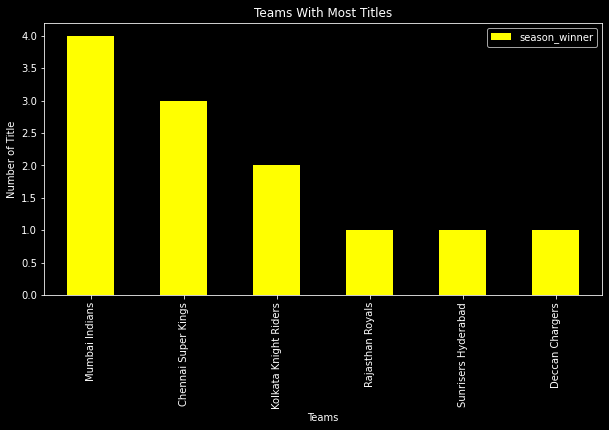

In [31]:
season_winner.plot.bar(xlabel='Teams',ylabel='Number of Title',title='Teams With Most Titles',color='yellow',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### Mumbai Indians is most succesful IPL Team with 4 IPL Titles followed by Chennai Super Kings(3 IPL Titles) and Kolkata Knight Riders(2 IPL Titles). These are also the Top 3 team who won maximum number of matches in IPL

### Toss impact on team wins

In [32]:
most_toss_win=df_matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

#### We can see that Rising Pune Supergiants apperared twice due to spelling mistake, let's fix this

In [33]:
df_matches['toss_winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)
df_matches['winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [34]:
most_toss_win=df_matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

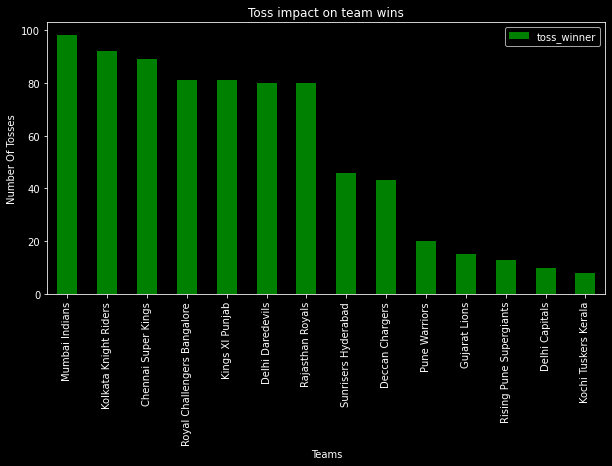

In [35]:
most_toss_win.plot.bar(xlabel='Teams',ylabel='Number Of Tosses',title='Toss impact on team wins',color='green',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### We can infer from this the winning the toss impacts on match winner as top 3 most succeful teams (Mumbai Indians,Kolkata Knight Riders & Chennai Super Kings) of ipl also won most number of tosses

### Toss decision by teams

In [36]:
toss_decision=df_matches['toss_decision'].value_counts()

In [37]:
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

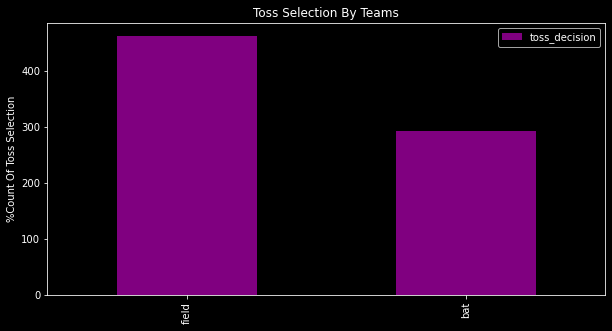

In [38]:
toss_decision.plot.bar(ylabel='%Count Of Toss Selection',title='Toss Selection By Teams',color='purple',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### From this analysis we can infer that most of time teams preferred field first when they won the toss
### Teams winning by batting first


In [39]:
most_win_batting_first=df_matches.winner[df_matches.win_by_runs!=0].value_counts()
most_win_batting_first



Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

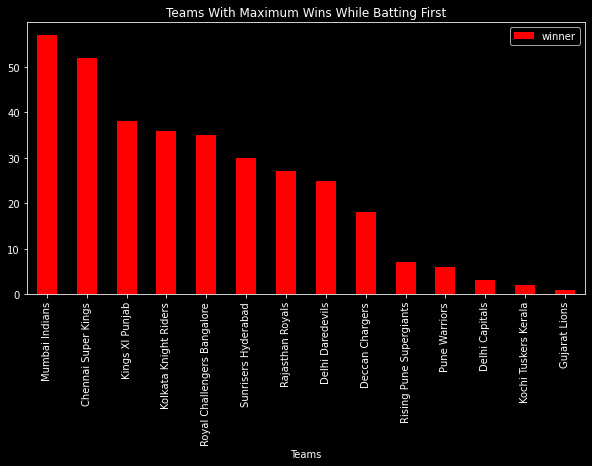

In [40]:
most_win_batting_first.plot.bar(xlabel='Teams',title='Teams With Maximum Wins While Batting First',color='red',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### We can see that Mumbai Indians registered most wins while batting first as compared to other teams, so from this analysis we can also say that Mumbai Indians is the best team while defending the score

### Teams winning by batting second

In [41]:
most_win_batting_second=df_matches.winner[df_matches.win_by_wickets!=0].value_counts()
most_win_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

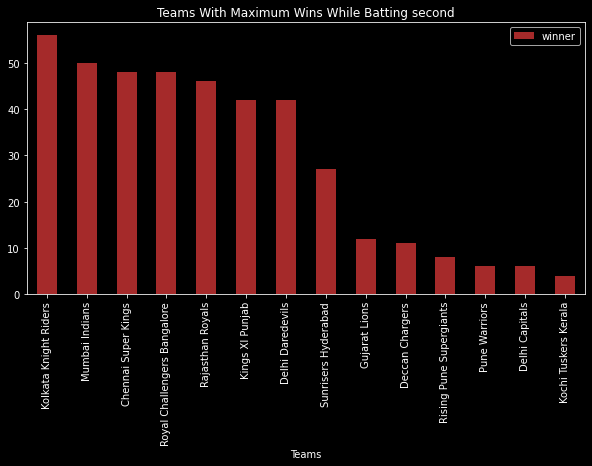

In [42]:
most_win_batting_second.plot.bar(xlabel='Teams',title='Teams With Maximum Wins While Batting second',color='brown',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### We can see that Kolkata Knight Riders registered most wins while batting second as compared to other teams, so from this analysis We can also say that Kolkata Knight Riders is the best team when chasing the target

### Category 1 (Analysis Of IPL Teams) - Key Insights:

#### • Total 14 teams participated in IPL over 11 Years(2008-2019) out of which only 6 teams managed to win the IPL Title
#### • Mumbai Indians is the most Successful team In the IPL history (with most number of IPL titles (4) and most number of match wins(109) followed by Chennai Super Kings (with 3 IPL titles and second most wins in IPL(100) and Kolkata Knight Rider(with 2 IPL titles and third most number of wins (92)
#### • from the toss analysis we can Infer that the Top 3 most successful teams also won maximum number of tosses and the teams who won the toss preffered to Field first 
#### • Mumbai Indians is the most successful team while defending the target
#### • Kolkata Knight Riders is the most successful team while chasing the target

## CATEGORY 2 - ANALYSIS OF IPL PLAYERS
### Most player of the match award

In [43]:
most_player_of_match=df_matches['player_of_match'].value_counts()[0:11]

In [44]:
most_player_of_match

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

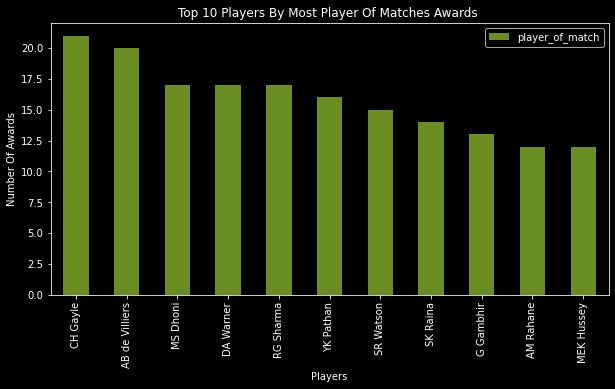

In [45]:
most_player_of_match.plot.bar(xlabel='Players',ylabel='Number Of Awards',title='Top 10 Players By Most Player Of Matches Awards ',color='olivedrab',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### We can see that CH Gayle got awarded with player of match the most ( 21 times ) followed by AB de Villiers ( 20 times ) and from this analysis we can infer that CH Gayle is the most valuable player to his team followed by AB de Villiers

### No. of players that batted for atleast one bowl in IPL so far

In [46]:
batters=len(df_deliveries['batsman'].unique())
batters

516

### No. of players that bowls for atleast one bowl in IPL so far

In [47]:
bowlers=len(df_deliveries['bowler'].unique())
bowlers

405

### Most delivaries played by batsman

In [48]:
played_most_deliveries=df_deliveries['batsman'].value_counts()[0:10]
played_most_deliveries


V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

<AxesSubplot:title={'center':'Batsman who faced most number of balls'}, xlabel='Players', ylabel='Total number of deliveries'>

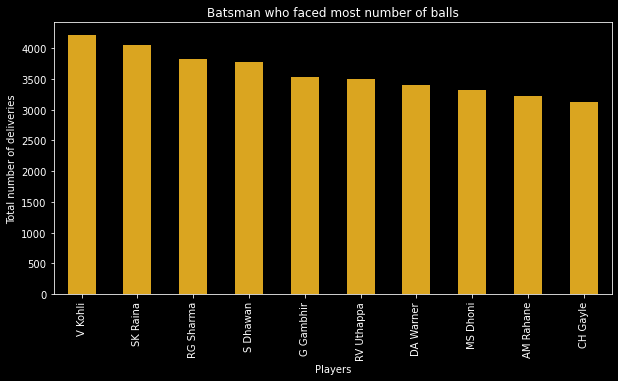

In [49]:
played_most_deliveries.plot.bar(xlabel='Players',ylabel='Total number of deliveries',title='Batsman who faced most number of balls',color='goldenrod',figsize=(10,5))

#### Virat Kohli played most number of balls in the IPL history

### Bowler with most deliveries

In [50]:
bowl_most_deliveries=df_deliveries['bowler'].value_counts()[0:10]
bowl_most_deliveries


Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

<AxesSubplot:title={'center':'Bowler with most deliveries'}, xlabel='Players', ylabel='Total number of deliveries'>

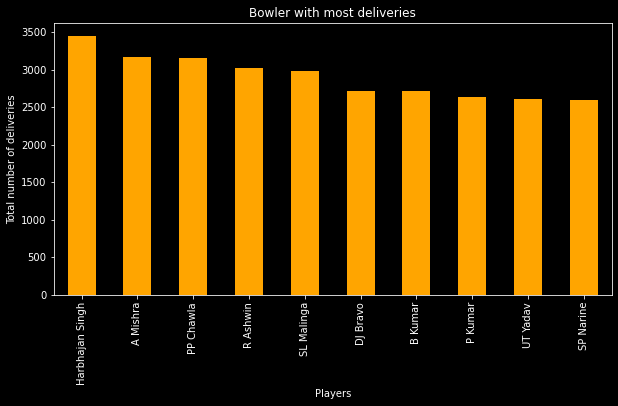

In [51]:
bowl_most_deliveries.plot.bar(xlabel='Players',ylabel='Total number of deliveries',title='Bowler with most deliveries',color='orange',figsize=(10,5))

#### Harbhajan Singh bowled most balls in IPL history so far

### Top 10 players with most runs in IPL history

In [52]:
top_run_getter=df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)[0:10]
top_run_getter

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

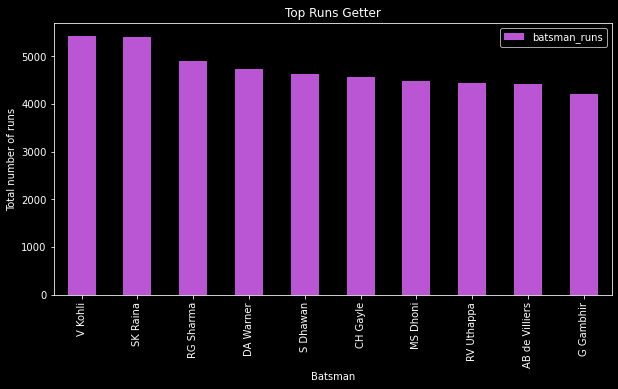

In [53]:
top_run_getter.plot.bar(xlabel='Batsman',ylabel='Total number of runs',title='Top Runs Getter',color='mediumorchid',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### We can see that Virat Kohli is the top run scorerwith 5434 runs, followed by Suresh Raina with 5415 runs and Rohit Sharma with 4914 runs and from this we can also infer that Indian batsman dominate the top scorer list
#### Now compare these top 3 run scorer batting performance by runs per season

### Comparison of top 3 run scorer per IPL season
#### 1. Virat Kohli
#### 2. Suresh Raina
#### 3. Rohit Sharma
#### For this comparison we need to merge two dataset

In [54]:
df=pd.merge(df_matches,df_deliveries,left_on='id',right_on='match_id')

#### Virat Kohli runs per season

In [55]:
vKohli=df[df['batsman']=='V Kohli']
vKohli=vKohli.groupby('season')['batsman_runs'].sum()
vKohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

#### Suresh Raina runs per season

In [56]:
raina=df[df['batsman']=='SK Raina']
raina=raina.groupby('season')['batsman_runs'].sum()
raina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

#### Rohit Sharma runs per season

In [57]:
sharma=df[df['batsman']=='RG Sharma']
sharma=sharma.groupby('season')['batsman_runs'].sum()
sharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

#### Plotting a line chart to compaire their performance

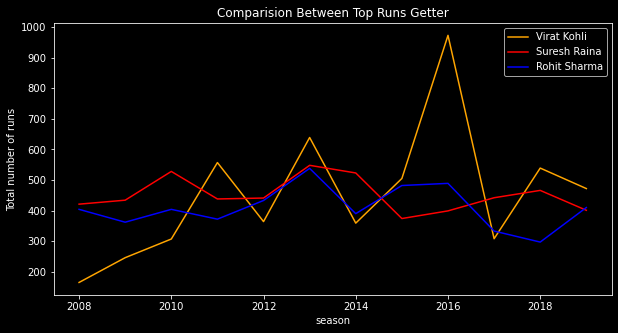

In [58]:
vKohli.plot.line(xlabel='Season',ylabel='Total number of runs',title='Comparision Between Top Runs Getter',color='orange',figsize=(10,5),label='Virat Kohli')
raina.plot.line(color='red',figsize=(10,5),label='Suresh Raina')
sharma.plot.line(color='blue',figsize=(10,5),label='Rohit Sharma')
plt.style.use('dark_background')
plt.legend()

#### From This We can Infer That
#### • Suresh Raina is the most consistent player in the IPL history
#### •  Rohit Sharma is also consistent but not as consistent as Suresh Raina
#### •  Virat Kohli didn't started his career well in IPL. We can see there are sharp rise & decline of runs trend in alternate seasons and as we can see a shape rise in Virat Kohli runs in 2016 season that means his most succesful season was 2016 where we performed exceptionally well, also Virat Kohli is least consistent among the three players





### Extra runs

In [59]:
extra_runs=df_deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False)[0:10]
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
DW Steyn           171
SR Watson          171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

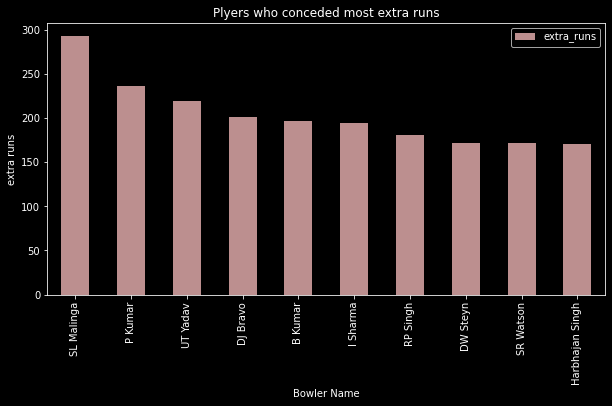

In [60]:
extra_runs.plot.bar(xlabel='Bowler Name',ylabel='extra runs',title='Plyers who conceded most extra runs',color='rosybrown',figsize=(10,5))
extra_runs
plt.style.use('dark_background')
plt.legend()

#### SL Malinga conceded the most extra runs in the history of IPL

### Which bowler dissmissed which batsman the most

In [61]:
bowl_out=df_deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending=False)[0:10]
bowl_out

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
SP Narine      RG Sharma           6
B Kumar        PA Patel            6
               AM Rahane           6
R Ashwin       RV Uthappa          6
A Mishra       RG Sharma           6
PP Chawla      AT Rayudu           6
Z Khan         G Gambhir           6
R Vinay Kumar  RG Sharma           6
Name: player_dismissed, dtype: int64

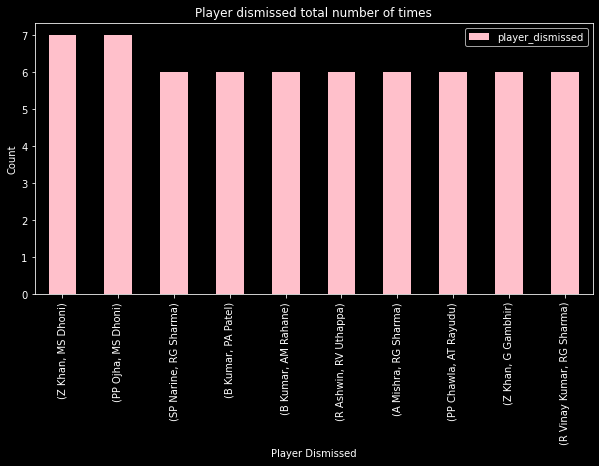

In [62]:
bowl_out.plot.bar(xlabel='Player Dismissed',ylabel='Count',title='Player dismissed total number of times',color='pink',figsize=(10,5))
bowl_out
plt.style.use('dark_background')
plt.legend()


#### from this analysis we can infer that M.S.Dhoni can't play well against Zaheer Khan and Pragyan Ojha as they dismissed him the most number of times (7) followed by Rohit Sharma 6 times dismissal by 3 Bowlers each (Vinay Kumar, A Mishra & SP Narine)

### Players who got dismissed most number of times

In [63]:
got_dismissed=df_deliveries['player_dismissed'].value_counts()[0:10]
got_dismissed

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
SR Watson     115
Name: player_dismissed, dtype: int64

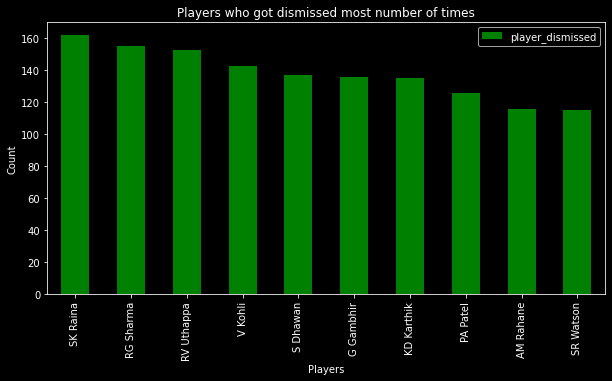

In [64]:
got_dismissed.plot.bar(xlabel='Players',ylabel='Count',title='Players who got dismissed most number of times',color='green',figsize=(10,5))
got_dismissed
plt.style.use('dark_background')
plt.legend()

#### SK Raina got out (162) times which is most in the IPL history, followed by RG Sharma(155) and RV Uthappa (153)

             bowler  No. of dot balls
59  Harbhajan Singh              1244
58       SL Malinga              1144
8           B Kumar              1116
50         A Mishra              1108
27        PP Chawla              1100


<AxesSubplot:title={'center':'Bowler with most number of dot balls'}, xlabel='bowler'>

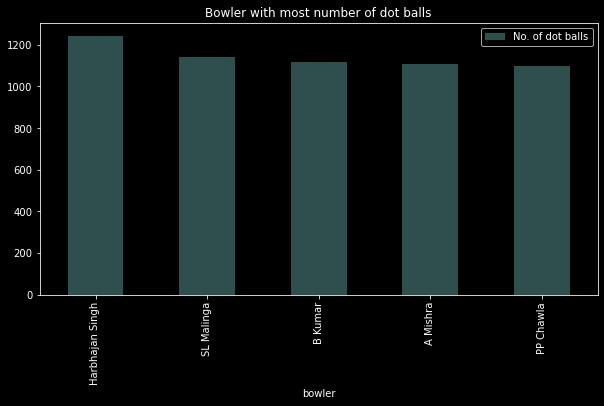

In [65]:
data = []

for i in df['bowler'].unique():
    data.append([i, len(df_deliveries[(df_deliveries['bowler'] == i) & (df_deliveries['total_runs'] == 0)])])

plot_data = pd.DataFrame(data,columns = ['bowler','No. of dot balls']).sort_values(by='No. of dot balls', ascending=False).head()
print(plot_data)
plot_data.plot(x = 'bowler', y = 'No. of dot balls', kind = 'bar', title='Bowler with most number of dot balls',figsize = (10,5), color = 'darkslategrey')

#### Harbhajan Singh hold the records for most dot balls (1244) in the IPL history. We can also see that out of 5 bowlers with most dot balls three of times are spinners, So we can infer that spinners are ahead in terms of dot balls.

### Top 10 players involve in most dismissal

In [66]:
most_dismissal_by_player=df_deliveries['fielder'].value_counts()[0:10]
most_dismissal_by_player

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
WP Saha            82
Name: fielder, dtype: int64

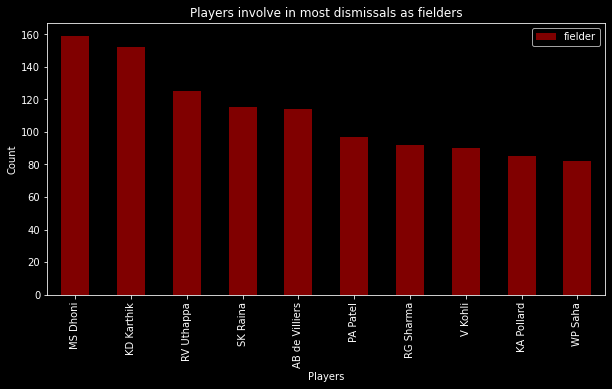

In [67]:
most_dismissal_by_player.plot.bar(xlabel='Players',ylabel='Count',title='Players involve in most dismissals as fielders',color='maroon',figsize=(10,5))
most_dismissal_by_player
plt.style.use('dark_background')
plt.legend()


#### MS Dhoni Involve in the most number of dismissal (159) ss fielders followed by KD Karthik(152) and RV Utappa(125) number of dismissal

### Category 2(Analysis Of IPL Players) - Key Insights :

#### • Top 15 Players by most runs category are dominated by the Indians and Virat Kohli is on Top with 5434 Runs followed By Suresh Raina (With 5415 Runs) and Rohit Sharma (with 4914 runs)

#### • From Top 3 Players(Run wise) analysis we can Infer that Suresh Raina is the most consistent player than Virat Kohli and Rohit Sharma

#### • Most player of the match awards are won by the big hitter with Chris Gayle at top with 21 Player of match award follwed by ABD vilers(With 20 Player of Match Awards) and from this analysis we can say that they are also the most valuable players to their respective teams over the years

#### • Harbhajan Singh bowled the most deliveries in IPL while Virat Kohli faced most deliveries as a Batsman.

#### • Harbhajan Singh holds the record for most dot balls in IPL So far

#### • Lasith Malinga conceded most extra runs in IPL so far

## CATEGORY 3 - ANALYSIS OF IPL MATCHES
### Top 10 venue details which hosted the most number of matches

In [68]:
venue_city=df_matches.groupby('venue')['city'].value_counts().sort_values(ascending=False)[0:10]
venue_city

venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
Feroz Shah Kotla                            Delhi         67
M Chinnaswamy Stadium                       Bangalore     66
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Dr DY Patil Sports Academy                  Mumbai        17
Name: city, dtype: int64

<AxesSubplot:title={'center':'Venue detailes which hosted the most number of matches'}, ylabel='venue'>

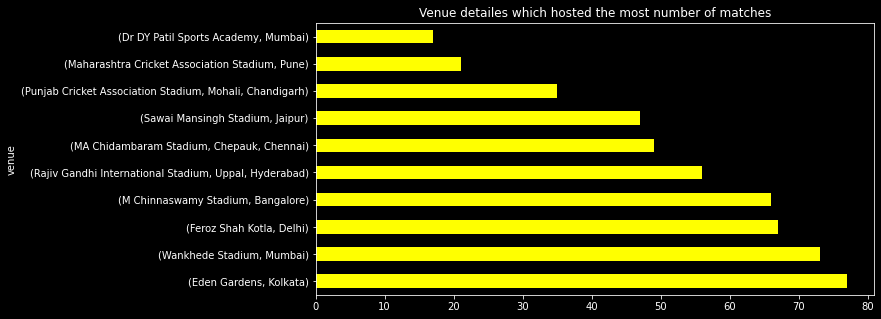

In [69]:
venue_city.plot.barh(xlabel='venue',ylabel='Counts',title='Venue detailes which hosted the most number of matches',color='yellow',figsize=(10,5))


#### Eden Garden Stadium of kolkata holds the record for hosting the most number of matches
### Season wise number of matches

In [70]:
season_wise_matches=df_matches['season'].value_counts()
season_wise_matches

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

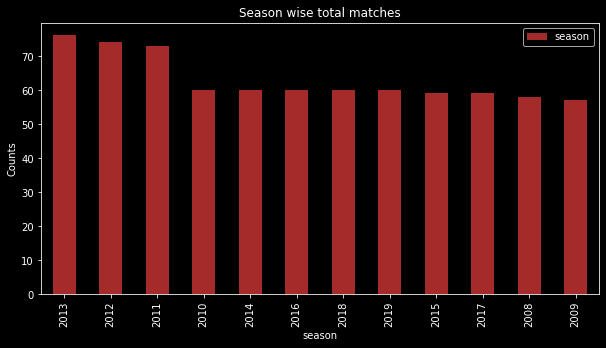

In [71]:
season_wise_matches.plot.bar(xlabel='season',ylabel='Counts',title='Season wise total matches',color='brown',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

### Match result

In [72]:
match_result=df_matches['result'].value_counts()
match_result

normal       743
tie            9
no result      4
Name: result, dtype: int64

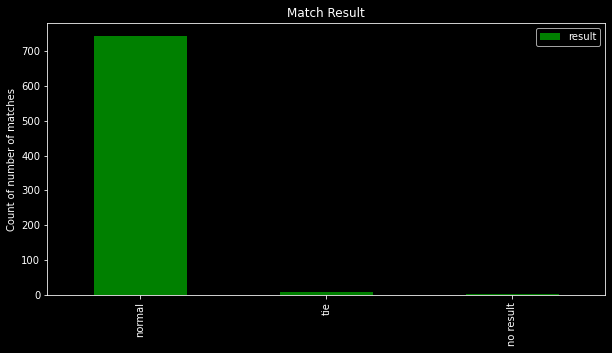

In [73]:
match_result=match_result.plot(kind='bar',color='green',figsize=(10,5))
plt.style.use('dark_background')
match_result.set_title('Match Result')
match_result.set_ylabel('Count of number of matches')
plt.legend()


#### We can infer that there are only 4 matches happened in the IPL so far when there was no result

### D/L rule

In [74]:
dl_rule=df_matches['dl_applied'].value_counts()
dl_rule

0    737
1     19
Name: dl_applied, dtype: int64

In [75]:
dl_rule=df_matches['dl_applied'].replace(to_replace=0,value='Not Applied',inplace=True)
dl_rule=df_matches['dl_applied'].replace(to_replace=1,value='Applied',inplace=True)
dl_rule=df_matches['dl_applied'].value_counts()
dl_rule

Not Applied    737
Applied         19
Name: dl_applied, dtype: int64

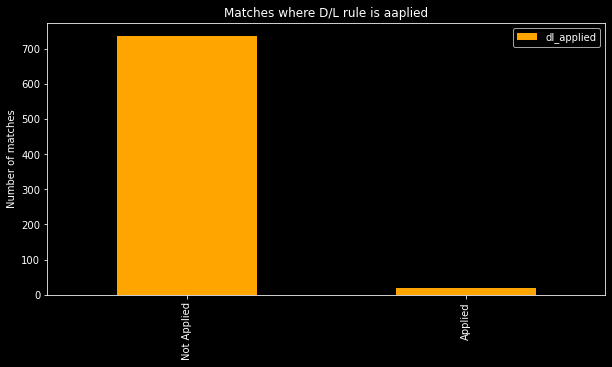

In [76]:
dl_rule=dl_rule.plot(kind='bar',color='orange',figsize=(10,5))
plt.style.use('dark_background')
dl_rule.set_title('Matches where D/L rule is aaplied')
dl_rule.set_ylabel('Number of matches')
plt.legend()

#### We can infer that there are only 19 matches in which D/L rule is applied

### Dismissal type

In [77]:
dismissal_type=df_deliveries['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

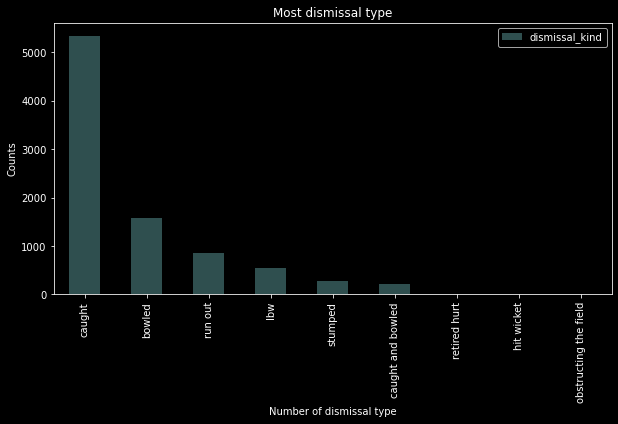

In [78]:
dismissal_type=dismissal_type.plot(kind='bar',color='darkslategrey',figsize=(10,5))
plt.style.use('dark_background')
dismissal_type.set_title('Most dismissal type')
dismissal_type.set_xlabel('Number of dismissal type')
dismissal_type.set_ylabel('Counts')
plt.legend()

#### Players gets dismissed the most by means of catches ( 5348 times )  and least by obstructing the field ( only 2 times )
### Super over

In [79]:
super_over=df_deliveries['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

#### Let's replace the "1" to "Yes" & "0" to "No"

In [80]:
super_over=df_deliveries['is_super_over'].replace(to_replace=0,value='No',inplace=True)
super_over=df_deliveries['is_super_over'].replace(to_replace=1,value='Yes',inplace=True)
super_over=df_deliveries['is_super_over'].value_counts()
super_over

No     178997
Yes        81
Name: is_super_over, dtype: int64

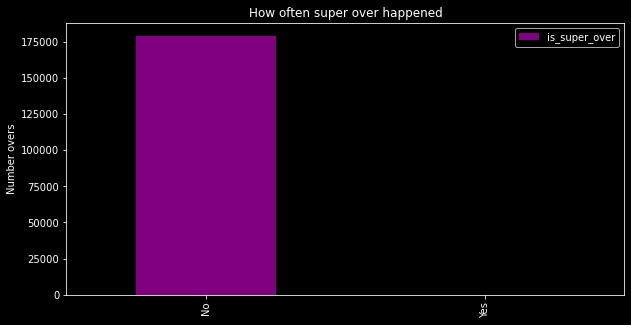

In [81]:
super_over.plot.bar(ylabel='Number overs',title='How often super over happened',color='purple',figsize=(10,5))
plt.style.use('dark_background')
plt.legend()

#### 81 super overs are played in the IPL history so far
### Close matches 
#### ( 1 Run win/lose & 1 Wicket win/lose )

In [82]:
close_matches_by1_run=df_matches.win_by_runs[df_matches.win_by_runs==1].value_counts()
close_matches_by1_run

1    10
Name: win_by_runs, dtype: int64

#### We can see there are 10 matches ended with win/lose by 1 run
#### Let's see the breakdown of these matches with the teams which involved the most in these matches

In [83]:
close_matches_by1_run=df_matches.winner[df_matches.win_by_runs==1].value_counts()
close_matches_by1_run

Mumbai Indians                 3
Royal Challengers Bangalore    2
Kings XI Punjab                2
Chennai Super Kings            1
Gujarat Lions                  1
Delhi Daredevils               1
Name: winner, dtype: int64

#### By 1 Wicket

In [84]:
close_matches_by1_wickets=df_matches.win_by_wickets[df_matches.win_by_wickets==1].value_counts()
close_matches_by1_wickets

1    3
Name: win_by_wickets, dtype: int64

#### We can see there are 10 matches ended with win/lose by 1 wicket
#### Let's see the breakdown of these matches with the teams which involved the most in these matches

In [85]:
close_matches_by1_wickets=df_matches.winner[df_matches.win_by_wickets==1].value_counts()
close_matches_by1_wickets

Sunrisers Hyderabad      1
Chennai Super Kings      1
Kolkata Knight Riders    1
Name: winner, dtype: int64

### Category 3 (Analysis Of IPL Matches) - Key Insights:

#### • Eden Garden Satdium of Kolkata city hosted themost number of matches(77) followed by Wankhede Stadium(73)

#### • Most matches played in 2013-Season (76 Matches) , followed by 2012-Season (74 Matches)

#### • D/L rule is applied to 19 matches

#### • Most dismissal type is catch in the IPL so far and the least type is "Obstructing The Field" by which only 2 players got dismissed.

#### • There are 81 super overs played in IPL so far